MLB 선수연봉 데이터 불러오기

In [3]:
import pandas as pd
df=pd.read_csv('http://wolfpack.hnu.ac.kr/Big_Data/data/MLB1871_2018/Salaries.csv')

In [4]:
df.shape

(26428, 5)

In [5]:
df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


결측치 제거

In [6]:
df.dropna(inplace=True)
df.shape

(26428, 5)

선수연봉 2016년 subset

In [7]:
df16=df[(df['yearID']==2016) & (df['salary']>0)] #연봉 0 초과 선수만 활용
df16.head(3)

,yearID,teamID,lgID,playerID,salary
25575,2016,ARI,NL,ahmedni01,521600
25576,2016,ARI,NL,barreja01,507500
25577,2016,ARI,NL,brachsi01,509300


In [12]:
# 2000년 이상 subset
df_2000=df[(df['yearID'] >= 2000) & (df['salary']>0)] #연봉 0 초과 선수만 활용
df_2000.head(3)

,yearID,teamID,lgID,playerID,salary
12263,2000,ANA,AL,anderga01,3250000
12264,2000,ANA,AL,belchti01,4600000
12265,2000,ANA,AL,botteke01,4000000


In [15]:
df_2000['yearID'].value_counts().sort_values(ascending=False)

2001    860
2008    856
2016    853
2012    848
2002    846
2007    842
2011    839
2000    836
2004    831
2005    831
2010    830
2003    827
2006    819
2015    817
2013    815
2009    813
2014    802
Name: yearID, dtype: int64

In [9]:
import matplotlib.pyplot as plt

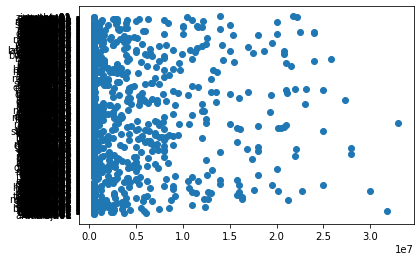

In [13]:
plt.scatter(data=df16, x="salary", y="playerID")

In [11]:
import plotly.express as px
plt.figure(figsize=(20,20))
fig = px.scatter(df16, x="salary", y="playerID", color="lgID",title="Player Salary with lgID")
fig.show()

<Figure size 1440x1440 with 0 Axes>

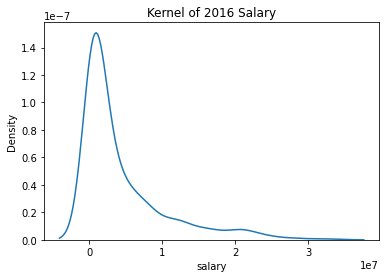

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(df16.salary).set_title('Kernel of 2016 Salary')
plt.show()

c:\ca_da\anaconda\envs\pro2_understood\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



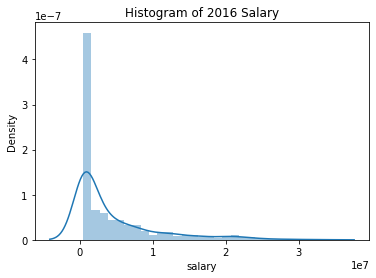

In [16]:
sns.distplot(df16.salary).set_title('Histogram of 2016 Salary')
plt.show()

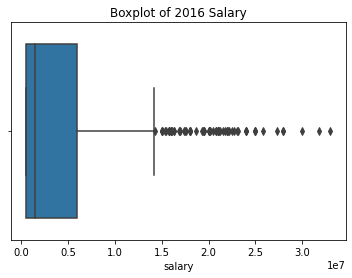

In [17]:
sns.boxplot(x="salary",data =df16).set_title('Boxplot of 2016 Salary')
plt.show()

## 실습


*   2016년 선수연봉과 2011년 선수연봉의 상자그림을 그리고 시각적으로 해석하시오.





##중심극한 정리 활용

sample data 만들기 n=50

In [18]:
df_sample=df16['salary'].sample(n=50, random_state=123) #seed=109

c:\ca_da\anaconda\envs\pro2_understood\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



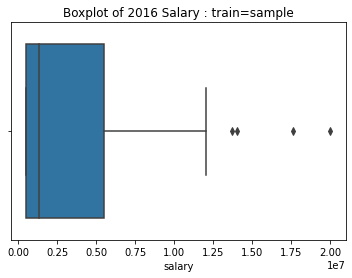

In [19]:
sns.boxplot(df_sample).set_title('Boxplot of 2016 Salary : train=sample')
plt.show()

크기 50인 확률표본  -> 평균, 100개 만들기

In [20]:
xbar=[]
for k in range(0,100):
  xbar.append(df16['salary'].sample(n=50).mean())

c:\ca_da\anaconda\envs\pro2_understood\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



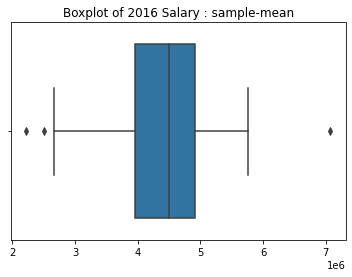

In [21]:
sns.boxplot(xbar).set_title('Boxplot of 2016 Salary : sample-mean')
plt.show()

##모집단 추론
2016년 MLB 선수들의 연봉이 40만불 이상인가?

In [22]:
pd.options.display.float_format = '{:.2f}'.format
print('Population mean %.1f' % df16['salary'].mean()) #모잡단 연봉

Population mean 4396409.6


추정

In [23]:
print('Point estimaor %.1f' % df_sample.mean())

Point estimaor 3850525.3


In [24]:
import scipy.stats as st
import numpy as np
LB=df_sample.mean()-st.t.ppf(0.975,df_sample.shape[0]-1)*df_sample.std()/np.sqrt(df_sample.shape[0])
UB=df_sample.mean()+st.t.ppf(0.975,df_sample.shape[0]-1)*df_sample.std()/np.sqrt(df_sample.shape[0])
print('95%'+' confidence interval (%.1f , %.1f)' % (LB, UB))

95% confidence interval (2499741.0 , 5201309.5)


가설검정


> H0 : mu=40 H1: mu!=40



In [25]:
from scipy import stats
stats.ttest_1samp(df_sample,40)

Ttest_1sampResult(statistic=5.728405264678308, pvalue=6.116830493746022e-07)